In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
TSdata = pd.read_csv("Treasury Squeeze raw score data.csv",index_col=0)
#convert label from True or False to 0,1
TSdata["squeeze"] = TSdata["squeeze"].astype(int)
X, y = TSdata.drop(["squeeze","contract"],axis=1) ,TSdata['squeeze']
TSdata.head()

,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
rowindex,,,,,,,,,,,
1,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,1
2,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,0
3,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,0
4,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,1
5,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,0


# K nearest Model

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=999)

In [4]:
max_acc, best_k= -1,-1
acc_list = []
ks = np.arange(1,21)
for k in ks:
    # train model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)
    if acc > max_acc:
        max_acc=acc
        best_k = k
print("Accuracy: {:.2f}% and best k : {}".format(max_acc * 100,best_k))

Accuracy: 62.78% and best k : 13


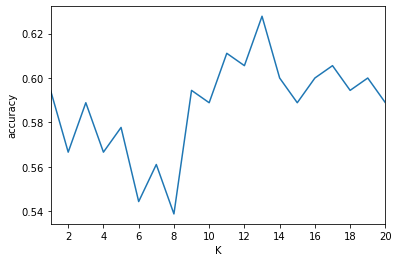

In [5]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.plot(ks,acc_list)
ax.set_xlim(ks.min(), ks.max())
ax.set_xlabel("K")
ax.set_ylabel("accuracy")
plt.show()

# Decision Tree

In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)


Accuracy: 0.5888888888888889


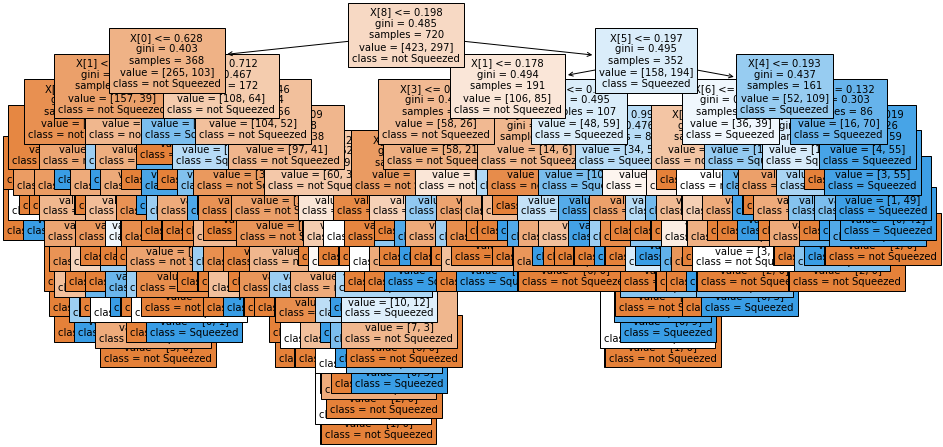

In [7]:
plt.figure(figsize=(15,7.5))
tree.plot_tree(clf, filled=True, fontsize=10, class_names=["not Squeezed",'Squeezed'])
plt.show()

In [8]:
print("My name is Saranpat Prasertthum")
print("My NetID is: 655667271")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Saranpat Prasertthum
My NetID is: 655667271
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
